#### **6-9-1. Naive Bayes: Gaussian**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sky=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/Skyserver.csv')
sky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [2]:
sky['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

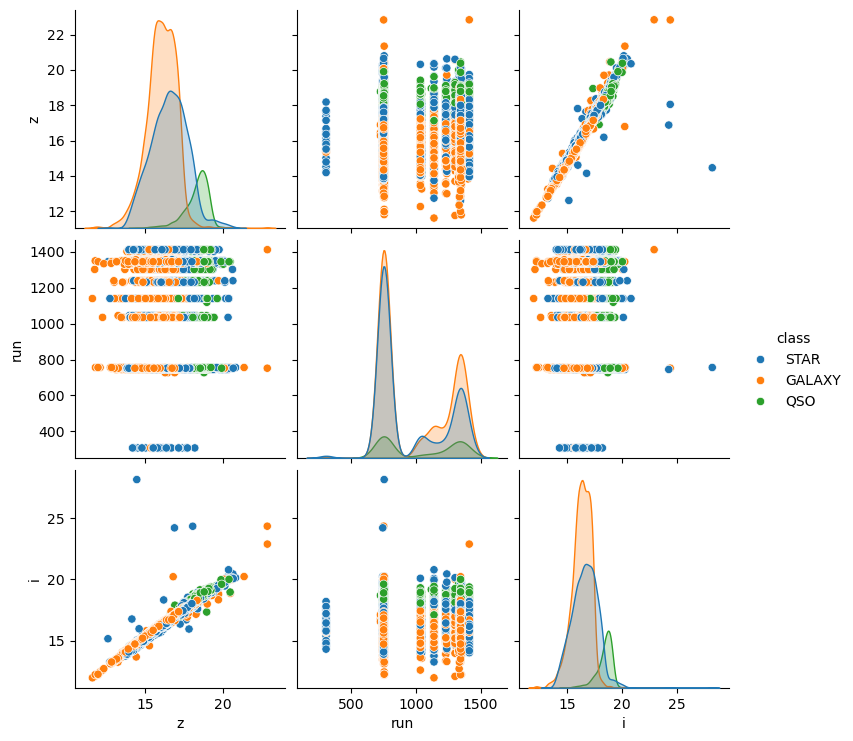

In [3]:
sns.pairplot (hue='class', data=sky[['z','run','i','class']])

In [11]:
from sklearn.model_selection import train_test_split

x_features = sky.columns.drop('class')
x = sky[x_features]
y = sky['class']

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7000, 17) (3000, 17) (7000,) (3000,)


In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
pred = gnb.fit(x_train, y_train).predict(x_test)
print ('Accuracy: %.2f%%' %(gnb.score(x_test, y_test)*100))

Accuracy: 79.90%


In [21]:
print(gnb.classes_)
print(gnb.class_prior_)

['GALAXY' 'QSO' 'STAR']
[0.49985714 0.085      0.41514286]


In [18]:
gnb.predict_proba(x_test)[[0, 13, 68]]

array([[8.26737014e-01, 4.43137039e-02, 1.28949282e-01],
       [5.39851854e-05, 9.64092748e-02, 9.03536740e-01],
       [8.32868012e-01, 4.48282737e-02, 1.22303715e-01]])

In [17]:
gnb.predict(x_test)[[0, 13, 68]]

array(['GALAXY', 'STAR', 'GALAXY'], dtype='<U6')

In [22]:
from sklearn.metrics import classification_report
print(classification_report (y_test, pred))

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



C:\Users\sunwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sunwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sunwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print(confusion_matrix (y_test, pred))
print('정확도: %.2f%%' %(accuracy_score (y_test, pred)*100))
print('정밀도: %.2f%%' %(precision_score (y_test, pred)*100))
print('재현율: %.2f%%' %(recall_score (y_test, pred)*100))
print('F1: %.2f%%' %(f1_score (y_test, pred)*100))

[[1301  194]
 [ 280 1225]]
정확도: 84.20%
정밀도: 86.33%
재현율: 81.40%
F1: 83.79%


#### **6-9-2. Naive Bayes: Bernoulli**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

spam=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/spam.csv', encoding='utf-8')
spam.info()
spam.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
spam.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [26]:
spam=spam[['v1','v2']]
spam['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [27]:
spam['label']=np.where(spam['v1']=='spam',1,0)
spam

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ? b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [28]:
from sklearn.model_selection import train_test_split

x = spam['v2']
y = spam['label']

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3900,) (1672,) (3900,) (1672,)


In [29]:
# 베르누이 나이브베이즈 분류에는 입력데이터로 이산형 데이터만 가능하기에 스팸 이메일 본문을 vector로 변환 
# CountVectorizer: 입력된 데이터에 출현된 모든 단어의 갯수만큼 벡터를 만들고 해당 이메일에서 단어 등장시 1, 아니면 0 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
x_train_cv = cv.fit_transform (x_train) 
x_train_cv.shape

(3900, 7175)

In [35]:
encoded_input = x_train_cv.toarray()
encoded_input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
print (cv.inverse_transform(encoded_input[[0]]))

[array(['couple', 'down', 'give', 'me', 'minutes', 'my', 'sure', 'to',
       'track', 'wallet', 'yeah'], dtype='<U34')]


In [48]:
#dir(cv)
print(cv.get_feature_names_out()[1000:1010], end=' ')

['at' 'ate' 'athletic' 'athome' 'atlanta' 'atlast' 'atm' 'attach'
 'attached' 'attack'] 

In [49]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train_cv, y_train)

BernoulliNB()

In [52]:
x_test_cv = cv.transform (x_test)
pred = bnb.predict(x_test_cv)

print ('Accuracy: %.2f%%' %(bnb.score(x_test_cv, y_test)*100))

Accuracy: 97.55%


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print(confusion_matrix (y_test, pred))
print('정확도: %.2f%%' %(accuracy_score (y_test, pred)*100))
print('정밀도: %.2f%%' %(precision_score (y_test, pred)*100))
print('재현율: %.2f%%' %(recall_score (y_test, pred)*100))
print('F1: %.2f%%' %(f1_score (y_test, pred)*100))

[[1447    1]
 [  40  184]]
정확도: 97.55%
정밀도: 99.46%
재현율: 82.14%
F1: 89.98%


#### **6-9-3. Naive Bayes: Multinomial**

In [55]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings ('ignore')

df=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/MovieReviews.csv', encoding='utf-8')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9999 non-null   object
 1   label   9999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


,review,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [56]:
from sklearn.model_selection import train_test_split

x = df['review']
y = df['label']

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6999,) (3000,) (6999,) (3000,)


In [57]:
# 베르누이 나이브베이즈 분류에는 입력데이터로 이산형 데이터만 가능하기에 스팸 이메일 본문을 vector로 변환 
# CountVectorizer: 입력된 데이터에 출현된 모든 단어의 갯수만큼 벡터를 만들고 해당 이메일에서 단어 등장시 1, 아니면 0 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
x_train_cv = cv.fit_transform (x_train) 
x_train_cv.shape

(6999, 45220)

In [58]:
print (cv.inverse_transform(encoded_input[[0]]))
print(cv.get_feature_names_out()[1000:1010], end=' ')

[array(['amsterdam', 'apolitical', 'attentions', 'bendingly', 'bernie',
       'bigg', 'cam', 'carly', 'carry', 'ceremonial', 'cheeni'],
      dtype='<U66')]
['adhered' 'adherence' 'adhering' 'adhesive' 'adibah' 'adieu' 'aditiya'
 'aditya' 'adj' 'adjacent'] 

In [59]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train_cv, y_train)

MultinomialNB()

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

x_test_cv = cv.transform (x_test)
pred = mnb.predict(x_test_cv)

print(confusion_matrix (y_test, pred))
print('정확도: %.2f%%' %(accuracy_score (y_test, pred)*100))
print('정밀도: %.2f%%' %(precision_score (y_test, pred)*100))
print('재현율: %.2f%%' %(recall_score (y_test, pred)*100))
print('F1: %.2f%%' %(f1_score (y_test, pred)*100))

[[1301  194]
 [ 280 1225]]
정확도: 84.20%
정밀도: 86.33%
재현율: 81.40%
F1: 83.79%
